In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random 
random.seed(42)

Q0: Design a Class - Pricing the 5 Options

In [ ]:
class AsianOptionMonteCarlo:
    def __init__(self, S0, K, r, sigma, T, M, N, strike_type='fixed', avg_type='arithmetic'):
        """
        S0 : Initial stock price
        K  : Strike price (only used for fixed strike)
        r  : Risk-free interest rate
        sigma : Volatility of the underlying asset
        T  : Time to expiration (in years)
        M  : Number of time steps
        N  : Number of Monte Carlo simulations
        strike_type : 'fixed' or 'floating'
        avg_type    : 'arithmetic' or 'geometric'
        """
        self.__S0 = S0
        self.__K = K
        self.__r = r
        self.__sigma = sigma
        self.__T = T
        self.__M = M
        self.__N = N
        self.__dt = T / M
        self.__strike_type = strike_type
        self.__avg_type = avg_type
    
    #Simulate stock price paths using Geometric Brownian Motion
    def generate_paths(self):
        S = np.zeros((self.__N, self.__M + 1))
        S[:, 0] = self.__S0
        
        for t in range(1, self.__M + 1):
            Z = np.random.standard_normal(self.__N)
            S[:, t] = S[:, t - 1] + self.__r * S[:, t - 1] * self.__dt + self.__sigma * S[:, t - 1] * np.sqrt(self.__dt) * Z
        return S
    
    #Price an Asian option using Monte Carlo simulation
    def price_option(self, option_type='call'):
        S = self.generate_paths()
        # Compute the average stock price
        if self.__avg_type == 'arithmetic':
            avg_price = np.mean(S[:, 1:], axis=1)
        elif self.__avg_type == 'geometric':
            avg_price = np.exp(np.mean(np.log(S[:, 1:]), axis=1))
        
        # Compute payoffs
        if self.__strike_type == 'fixed':
            K = self.__K
            if option_type == 'call':
                payoffs = np.maximum(avg_price - K, 0)
            elif option_type == 'put':
                payoffs = np.maximum(K - avg_price, 0)
        elif self.__strike_type == 'floating':
            # Extract the final stock price at T
            S_T = S[:, -1]  
            if option_type == 'call':
                payoffs = np.maximum(S_T - avg_price, 0)
            elif option_type == 'put':
                payoffs = np.maximum(avg_price - S_T, 0)
        
        # Discount the payoffs to present value
        option_price = np.exp(-self.__r * self.__T) * np.mean(payoffs)
        std_error = np.exp(-self.__r * self.__T) * np.std(payoffs) / np.sqrt(self.__N)
        return option_price, std_error

In [ ]:
S0 = 100
r = 0.01
N_sim = 10000 # Before deciding N in Q1 we have used the maximum number of simulations suggested of 10,000 
M = 250 # This is an arbitary number we set 

averaging_types = ['arithmetic', 'geometric']
strike_types = ['fixed', 'floating']
option_types = ['call', 'put']

# Table 2 values
options_data = [
    {'label': '#1', 'K': 120.00, 'mu': 0.08, 'sigma': 0.20, 'T_days': 30},
    {'label': '#2', 'K': 80.00,  'mu': 0.05, 'sigma': 0.20, 'T_days': 30},
    {'label': '#3', 'K': 100.00, 'mu': 0.08, 'sigma': 0.25, 'T_days': 90},
    {'label': '#4', 'K': 80.00,  'mu': 0.04, 'sigma': 0.15, 'T_days': 60},
    {'label': '#5', 'K': 150.00, 'mu': 0.08, 'sigma': 0.40, 'T_days': 90},
]


#   - K (Strike Price) — The predetermined price at which the option holder can buy (call) or sell (put) the underlying asset. E.g., K=120 means the     
#   option gives the right to transact at $120.
#   - mu (μ, Expected Return / Drift Rate) — The annualized expected rate of return of the underlying asset under the real-world (physical) probability  
#   measure. E.g., mu=0.08 means an 8% expected annual return. Note: in Black-Scholes pricing, the risk-free rate r replaces mu, but mu is used in Monte
#   Carlo simulation of stock paths under the physical measure.                                                                                          
#   - sigma (σ, Volatility) — The annualized standard deviation of the underlying asset's returns. Measures how much the price fluctuates. E.g.,
#   sigma=0.20 means 20% annual volatility — higher sigma means wider range of possible future prices and higher option premiums.
#   - T_days (Time to Expiration in Days) — The number of calendar days until the option expires. Typically converted to years as T = T_days / 365 for
#   use in pricing formulas. E.g., T_days=30 means the option expires in 30 days (~0.082 years).
  

In [4]:
# Display results for Q0
for data in options_data:
    print(f"\n==== Option {data['label']} ====")
    T = data['T_days'] / 365  # convert days to years
    for avg in averaging_types:
        for strike in strike_types:
            for otype in option_types:
                pricer = AsianOptionMonteCarlo(
                    S0=S0, K=data['K'], r=r, sigma=data['sigma'],
                    T=T, M=M, N=N_sim,
                    avg_type=avg,
                    strike_type=strike
                )
                price, se = pricer.price_option(option_type=otype)
                print(f"{otype.capitalize()} | {avg} avg | {strike} strike => (Price, Standard Error): ({price:.4f}, {se:.4f})")


==== Option #1 ====
Call | arithmetic avg | fixed strike => (Price, Standard Error): (0.0000, 0.0000)
Put | arithmetic avg | fixed strike => (Price, Standard Error): (19.9102, 0.0331)
Call | arithmetic avg | floating strike => (Price, Standard Error): (1.3527, 0.0202)
Put | arithmetic avg | floating strike => (Price, Standard Error): (1.2789, 0.0183)
Call | geometric avg | fixed strike => (Price, Standard Error): (0.0000, 0.0000)
Put | geometric avg | fixed strike => (Price, Standard Error): (19.9629, 0.0332)
Call | geometric avg | floating strike => (Price, Standard Error): (1.3423, 0.0203)
Put | geometric avg | floating strike => (Price, Standard Error): (1.2984, 0.0184)

==== Option #2 ====
Call | arithmetic avg | fixed strike => (Price, Standard Error): (20.0203, 0.0332)
Put | arithmetic avg | fixed strike => (Price, Standard Error): (0.0000, 0.0000)
Call | arithmetic avg | floating strike => (Price, Standard Error): (1.3118, 0.0200)
Put | arithmetic avg | floating strike => (Pric

Q1: Simulation Performance (Option #1)

In [ ]:
simulations = range(100,10000,250) # N range of 100 - 10,000
call_prices = []
put_prices = []
call_errors = []
put_errors = []

for N in simulations:
    option = AsianOptionMonteCarlo(S0=100, K=120, r=r, sigma=0.2, T=30/365, M=M, N=N)
    call_price, call_error = option.price_option('call')
    put_price, put_error = option.price_option('put')
    call_prices.append(call_price)
    put_prices.append(put_price)
    call_errors.append(call_error)
    put_errors.append(put_error)


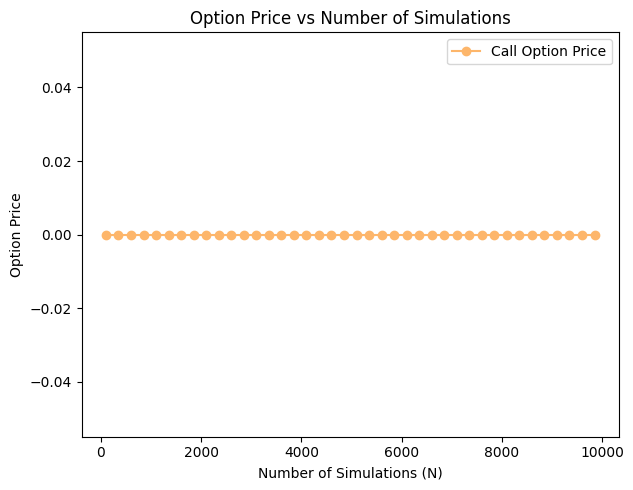

In [6]:
# Plot call prices vs number of simulations
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(simulations, call_prices, marker='o', color='#FDB66B', label='Call Option Price')   # light orange

plt.xlabel("Number of Simulations (N)")
plt.ylabel("Option Price")
plt.title("Option Price vs Number of Simulations")
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


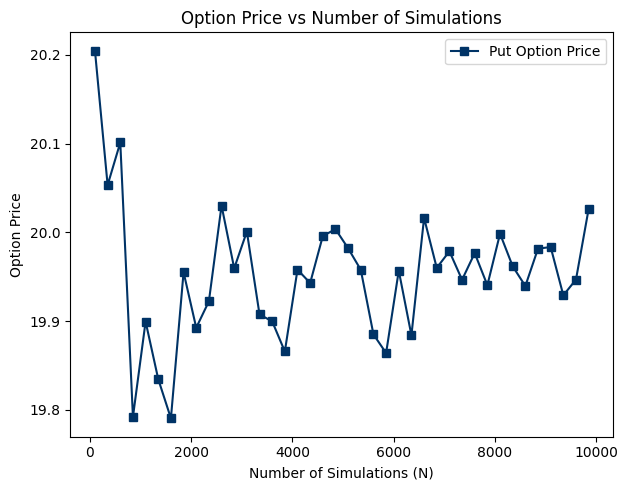

In [71]:
# Plot put prices vs number of simulations
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

plt.plot(simulations, put_prices, marker='s', color='#003366', label='Put Option Price')    # dark blue
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Option Price")
plt.title("Option Price vs Number of Simulations")
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

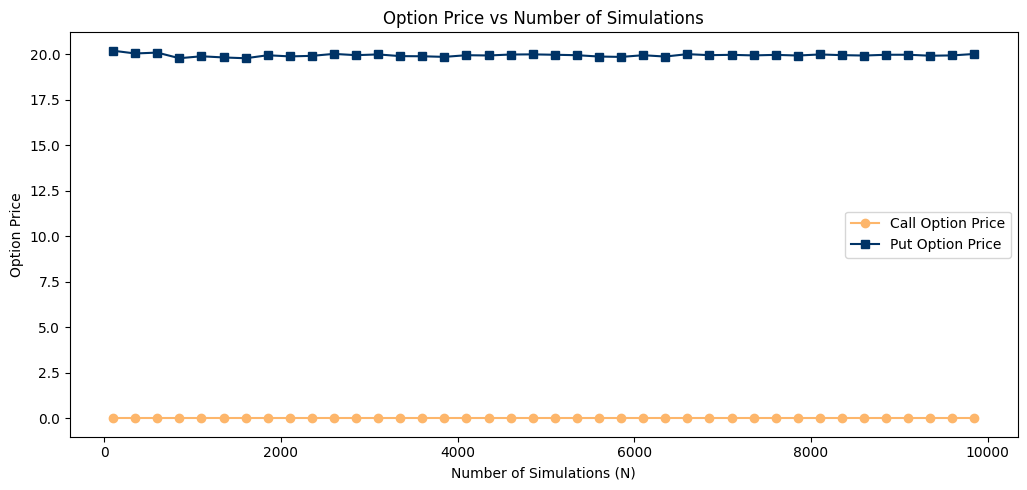

In [8]:
# Plot call and put prices vs number of simulations (same graph)
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(simulations, call_prices, marker='o', color='#FDB66B', label='Call Option Price')   # light orange
plt.plot(simulations, put_prices, marker='s', color='#003366', label='Put Option Price')    # dark blue

plt.xlabel("Number of Simulations (N)")
plt.ylabel("Option Price")
plt.title("Option Price vs Number of Simulations")
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

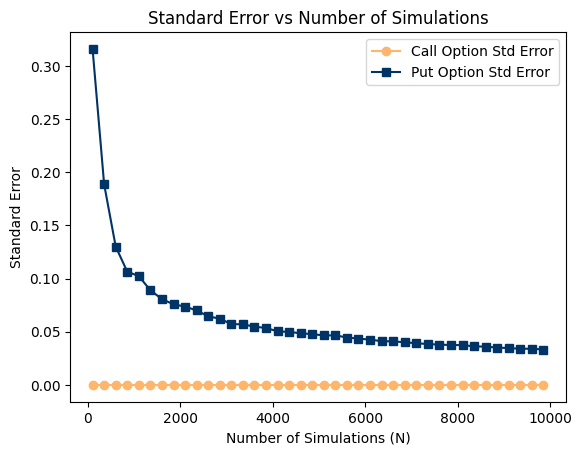

In [9]:
# Plot standard error vs number of simulations
plt.plot(simulations, call_errors, marker='o', color='#FDB66B', label='Call Option Std Error')
plt.plot(simulations, put_errors, marker='s', color='#003366', label='Put Option Std Error')
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Standard Error")
plt.title("Standard Error vs Number of Simulations")
plt.legend(loc='upper right')
plt.show()

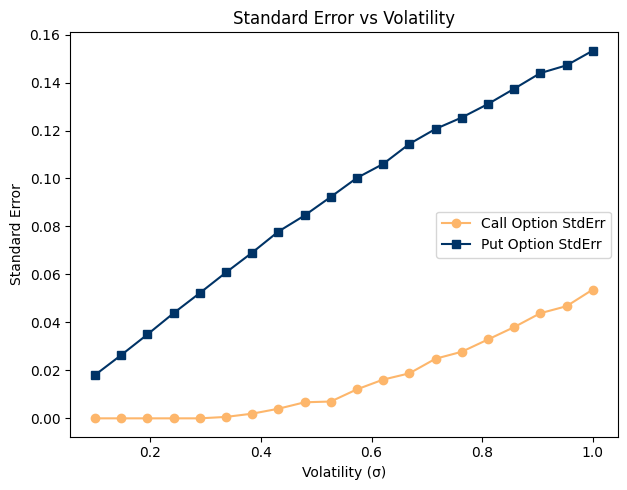

In [20]:
vol_range = np.linspace(0.1, 1.0, 20) # Arbitarty volatility range of 0.1 - 1.0
call_errors = []
put_errors = []

# Compute standard errors for various volatilities
for sigma in vol_range:
    option = AsianOptionMonteCarlo(S0=100, K=120, r=r, sigma=sigma, T=30/365, M=M, N=8500) # N = 8500 used  since that's what we determined to use in above part
    call_price, call_error = option.price_option('call')
    put_price, put_error = option.price_option('put')
    call_errors.append(call_error)
    put_errors.append(put_error)

# Plot standard error vs volatility
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(vol_range, call_errors, color='#FDB66B', marker='o', label='Call Option StdErr')
plt.plot(vol_range, put_errors, color='#003366', marker='s', label='Put Option StdErr')
plt.xlabel("Volatility (σ)")
plt.ylabel("Standard Error")
plt.title("Standard Error vs Volatility")
plt.legend(loc='center right')
plt.tight_layout()
plt.show()


Q2: Varying Stock Price (Option #1 and Option #2)

/var/folders/c3/2t4yd38x5m103yrj8qvzrt7c0000gn/T/ipykernel_7690/1882754563.py:45: RuntimeWarning: divide by zero encountered in log
  avg_price = np.exp(np.mean(np.log(S[:, 1:]), axis=1))


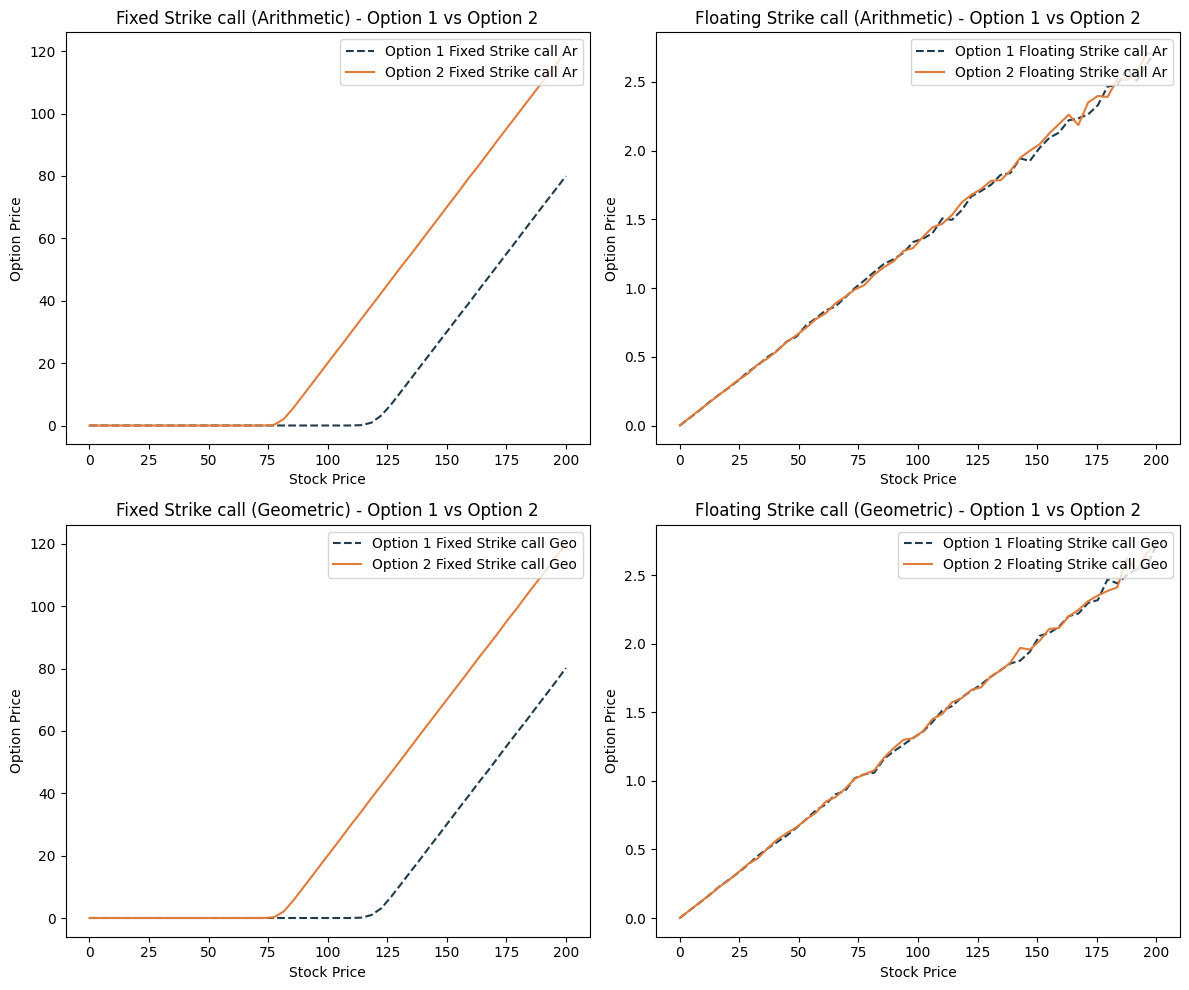

In [22]:
stock_prices = np.linspace(0, 200, 50) # Stock price range of 0 - 200
option1_call_prices_fixed_ar = []
option1_call_prices_fixed_geo = []
option1_call_prices_floating_ar = []
option1_call_prices_floating_geo = []
option2_call_prices_fixed_ar = []
option2_call_prices_fixed_geo = []
option2_call_prices_floating_ar = []
option2_call_prices_floating_geo = []

for S in stock_prices:
    option1_fixed_ar = AsianOptionMonteCarlo(S0=S, K=120, r=r, sigma=0.20, T=30/365, M=M, N=8500, strike_type='fixed', avg_type="arithmetic")
    option1_floating_ar = AsianOptionMonteCarlo(S0=S, K=120, r=r, sigma=0.20, T=30/365, M=M, N=8500, strike_type='floating', avg_type="geometric")
    option1_fixed_geo = AsianOptionMonteCarlo(S0=S, K=120, r=r, sigma=0.20, T=30/365, M=M, N=8500, strike_type='fixed', avg_type="arithmetic")
    option1_floating_geo = AsianOptionMonteCarlo(S0=S, K=120, r=r, sigma=0.20, T=30/365, M=M, N=8500, strike_type='floating', avg_type="geometric")
    option1_call_price_fixed_ar, _ = option1_fixed_ar.price_option('call')
    option1_call_price_fixed_geo, _ = option1_fixed_geo.price_option('call')
    option1_call_price_floating_ar, _ = option1_floating_ar.price_option('call')
    option1_call_price_floating_geo, _ = option1_floating_geo.price_option('call')

    option1_call_prices_fixed_ar.append(option1_call_price_fixed_ar)
    option1_call_prices_fixed_geo.append(option1_call_price_fixed_geo)
    option1_call_prices_floating_ar.append(option1_call_price_floating_ar)
    option1_call_prices_floating_geo.append(option1_call_price_floating_geo)
    
    option2_fixed_ar = AsianOptionMonteCarlo(S0=S, K=80, r=r, sigma=0.20, T=30/365, M=M, N=8500, strike_type='fixed', avg_type="arithmetic")
    option2_floating_ar = AsianOptionMonteCarlo(S0=S, K=80, r=r, sigma=0.20, T=30/365, M=M, N=8500, strike_type='floating', avg_type="geometric")
    option2_fixed_geo = AsianOptionMonteCarlo(S0=S, K=80, r=r, sigma=0.20, T=30/365, M=M, N=8500, strike_type='fixed', avg_type="arithmetic")
    option2_floating_geo = AsianOptionMonteCarlo(S0=S, K=80, r=r, sigma=0.20, T=30/365, M=M, N=8500, strike_type='floating', avg_type="geometric")
    option2_call_price_fixed_ar, _ = option2_fixed_ar.price_option('call')
    option2_call_price_fixed_geo, _ = option2_fixed_geo.price_option('call')
    option2_call_price_floating_ar, _ = option2_floating_ar.price_option('call')
    option2_call_price_floating_geo, _ = option2_floating_geo.price_option('call')
    
    option2_call_prices_fixed_ar.append(option2_call_price_fixed_ar)
    option2_call_prices_fixed_geo.append(option2_call_price_fixed_geo)
    option2_call_prices_floating_ar.append(option2_call_price_floating_ar)
    option2_call_prices_floating_geo.append(option2_call_price_floating_geo)
    
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

color_option1 = '#1f3b4d'  # Navy Blue
color_option2 = '#e07b39'  # Burnt Orange

# Fixed Strike call (Arithmetic)
axs[0, 0].plot(stock_prices, option1_call_prices_fixed_ar, label="Option 1 Fixed Strike call Ar", linestyle='dashed', color=color_option1)
axs[0, 0].plot(stock_prices, option2_call_prices_fixed_ar, label="Option 2 Fixed Strike call Ar", color=color_option2)
axs[0, 0].set_title("Fixed Strike call (Arithmetic) - Option 1 vs Option 2")
axs[0, 0].set_xlabel("Stock Price")
axs[0, 0].set_ylabel("Option Price")
axs[0, 0].legend(loc='upper right')

# Floating Strike call (Arithmetic)
axs[0, 1].plot(stock_prices, option1_call_prices_floating_ar, label="Option 1 Floating Strike call Ar", linestyle='dashed', color=color_option1)
axs[0, 1].plot(stock_prices, option2_call_prices_floating_ar, label="Option 2 Floating Strike call Ar", color=color_option2)
axs[0, 1].set_title("Floating Strike call (Arithmetic) - Option 1 vs Option 2")
axs[0, 1].set_xlabel("Stock Price")
axs[0, 1].set_ylabel("Option Price")
axs[0, 1].legend(loc='upper right')

# Fixed Strike call (Geometric)
axs[1, 0].plot(stock_prices, option1_call_prices_fixed_geo, label="Option 1 Fixed Strike call Geo", linestyle='dashed', color=color_option1)
axs[1, 0].plot(stock_prices, option2_call_prices_fixed_geo, label="Option 2 Fixed Strike call Geo", color=color_option2)
axs[1, 0].set_title("Fixed Strike call (Geometric) - Option 1 vs Option 2")
axs[1, 0].set_xlabel("Stock Price")
axs[1, 0].set_ylabel("Option Price")
axs[1, 0].legend(loc='upper right')

# Floating Strike call (Geometric)
axs[1, 1].plot(stock_prices, option1_call_prices_floating_geo, label="Option 1 Floating Strike call Geo", linestyle='dashed', color=color_option1)
axs[1, 1].plot(stock_prices, option2_call_prices_floating_geo, label="Option 2 Floating Strike call Geo", color=color_option2)
axs[1, 1].set_title("Floating Strike call (Geometric) - Option 1 vs Option 2")
axs[1, 1].set_xlabel("Stock Price")
axs[1, 1].set_ylabel("Option Price")
axs[1, 1].legend(loc='upper right')

plt.tight_layout()
plt.show()


Q3: Varying Volatility (Option #4 and Option #5)

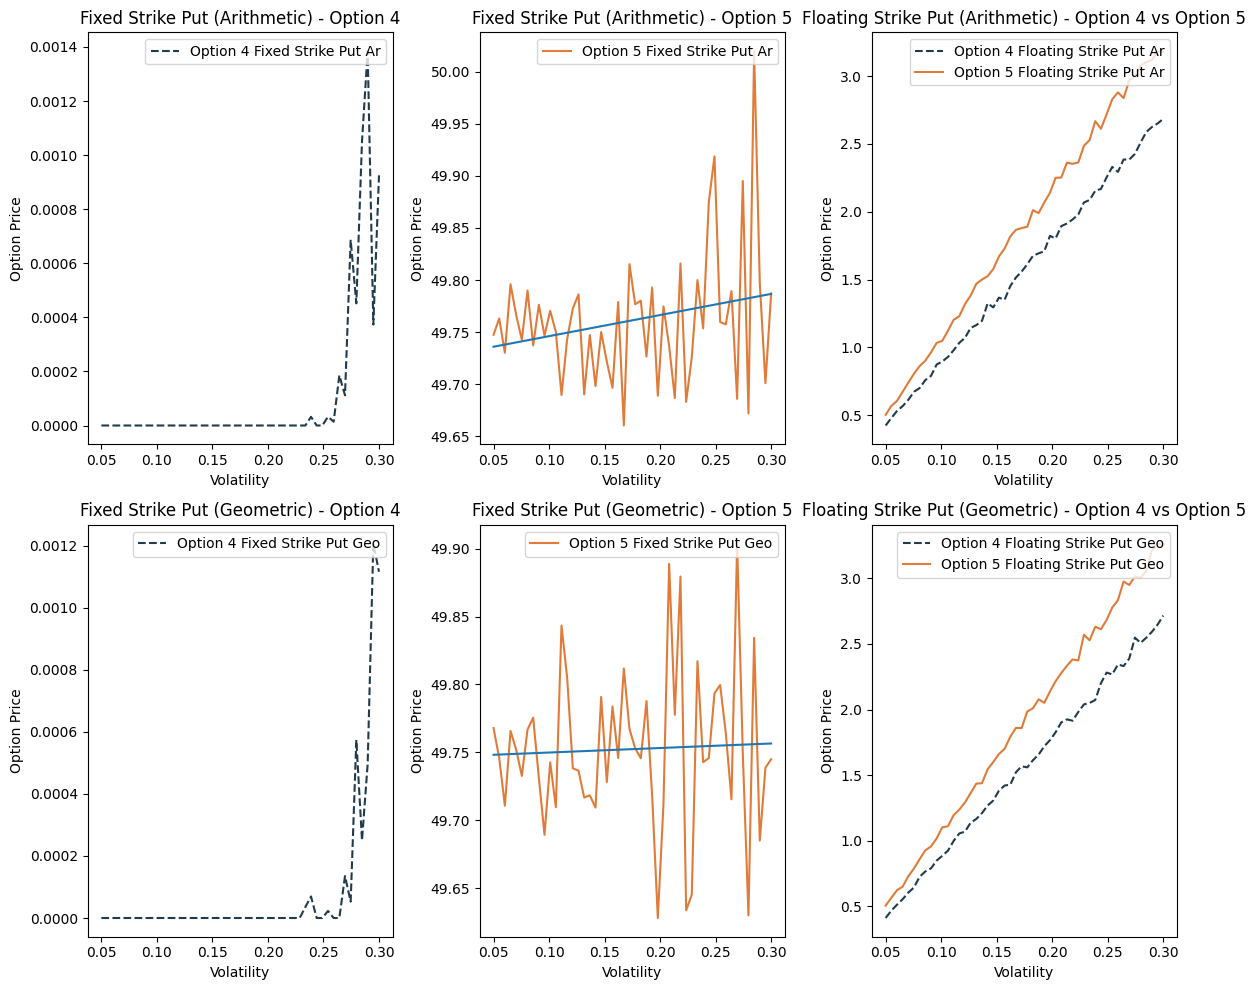

In [56]:
volatilities = np.linspace(0.05, 0.3, 50) # Volatilities range of 0 - 200
option4_put_prices_fixed_ar = []
option4_put_prices_fixed_geo = []
option4_put_prices_floating_ar = []
option4_put_prices_floating_geo = []
option5_put_prices_fixed_ar = []
option5_put_prices_fixed_geo = []
option5_put_prices_floating_ar = []
option5_put_prices_floating_geo = []

for sigma in volatilities:
    option4_fixed_ar = AsianOptionMonteCarlo(S0=100, K=80, r=r, sigma=sigma, T=60/365, M=M, N=8500, strike_type='fixed', avg_type="arithmetic")
    option4_floating_ar = AsianOptionMonteCarlo(S0=100, K=80, r=r, sigma=sigma, T=60/365, M=M, N=8500, strike_type='floating', avg_type="geometric")
    option4_fixed_geo = AsianOptionMonteCarlo(S0=100, K=80, r=r, sigma=sigma, T=60/365, M=M, N=8500, strike_type='fixed', avg_type="arithmetic")
    option4_floating_geo = AsianOptionMonteCarlo(S0=100, K=80, r=r, sigma=sigma, T=60/365, M=M, N=8500, strike_type='floating', avg_type="geometric")
    option4_put_price_fixed_ar, _ = option4_fixed_ar.price_option('put')
    option4_put_price_fixed_geo, _ = option4_fixed_geo.price_option('put')
    option4_put_price_floating_ar, _ = option4_floating_ar.price_option('put')
    option4_put_price_floating_geo, _ = option4_floating_geo.price_option('put')

    option4_put_prices_fixed_ar.append(option4_put_price_fixed_ar)
    option4_put_prices_fixed_geo.append(option4_put_price_fixed_geo)
    option4_put_prices_floating_ar.append(option4_put_price_floating_ar)
    option4_put_prices_floating_geo.append(option4_put_price_floating_geo)
    
    option5_fixed_ar = AsianOptionMonteCarlo(S0=100, K=150, r=r, sigma=sigma, T=90/365, M=M, N=8500, strike_type='fixed', avg_type="arithmetic")
    option5_floating_ar = AsianOptionMonteCarlo(S0=100, K=150, r=r, sigma=sigma, T=90/365, M=M, N=8500, strike_type='floating', avg_type="geometric")
    option5_fixed_geo = AsianOptionMonteCarlo(S0=100, K=150, r=r, sigma=sigma, T=90/365, M=M, N=8500, strike_type='fixed', avg_type="arithmetic")
    option5_floating_geo = AsianOptionMonteCarlo(S0=100, K=150, r=r, sigma=sigma, T=90/365, M=M, N=8500, strike_type='floating', avg_type="geometric")
    option5_put_price_fixed_ar, _ = option5_fixed_ar.price_option('put')
    option5_put_price_fixed_geo, _ = option5_fixed_geo.price_option('put')
    option5_put_price_floating_ar, _ = option5_floating_ar.price_option('put')
    option5_put_price_floating_geo, _ = option5_floating_geo.price_option('put')
    
    option5_put_prices_fixed_ar.append(option5_put_price_fixed_ar)
    option5_put_prices_fixed_geo.append(option5_put_price_fixed_geo)
    option5_put_prices_floating_ar.append(option5_put_price_floating_ar)
    option5_put_prices_floating_geo.append(option5_put_price_floating_geo)
    
fig, axs = plt.subplots(2, 3, figsize=(12, 10))

color_option4 = '#1f3b4d'  # Navy Blue
color_option5 = '#e07b39'  # Burnt Orange

# Fixed Strike Put (Arithmetic)
axs[0, 0].plot(volatilities, option4_put_prices_fixed_ar, label="Option 4 Fixed Strike Put Ar", linestyle='dashed', color=color_option4)
axs[0, 0].set_title("Fixed Strike Put (Arithmetic) - Option 4")
axs[0, 0].set_xlabel("Volatility")
axs[0, 0].set_ylabel("Option Price")
axs[0, 0].legend(loc='upper right')

axs[0, 1].plot(volatilities, option5_put_prices_fixed_ar, label="Option 5 Fixed Strike Put Ar", color=color_option5)
trendline = np.poly1d(np.polyfit(volatilities,option5_put_prices_fixed_ar,1)) # equation for trendline
axs[0, 1].plot(volatilities, trendline(volatilities)) # plot trendline
axs[0, 1].set_title("Fixed Strike Put (Arithmetic) - Option 5")
axs[0, 1].set_xlabel("Volatility")
axs[0, 1].set_ylabel("Option Price")
axs[0, 1].legend(loc='upper right')

# Fixed Strike Put (Geometric)
axs[1, 0].plot(volatilities, option4_put_prices_fixed_geo, label="Option 4 Fixed Strike Put Geo", linestyle='dashed', color=color_option4)
axs[1, 0].set_title("Fixed Strike Put (Geometric) - Option 4")
axs[1, 0].set_xlabel("Volatility")
axs[1, 0].set_ylabel("Option Price")
axs[1, 0].legend(loc='upper right')

axs[1, 1].plot(volatilities, option5_put_prices_fixed_geo, label="Option 5 Fixed Strike Put Geo", color=color_option5)
trendline = np.poly1d(np.polyfit(volatilities,option5_put_prices_fixed_geo,1)) # equation for trendline
axs[1, 1].plot(volatilities, trendline(volatilities)) # plot trendline
axs[1, 1].set_title("Fixed Strike Put (Geometric) - Option 5")

axs[1, 1].set_xlabel("Volatility")
axs[1, 1].set_ylabel("Option Price")
axs[1, 1].legend(loc='upper right')

# Floating Strike Put (Arithmetic)
axs[0, 2].plot(volatilities, option4_put_prices_floating_ar, label="Option 4 Floating Strike Put Ar", linestyle='dashed', color=color_option4)
axs[0, 2].plot(volatilities, option5_put_prices_floating_ar, label="Option 5 Floating Strike Put Ar", color=color_option5)
axs[0, 2].set_title("Floating Strike Put (Arithmetic) - Option 4 vs Option 5")
axs[0, 2].set_xlabel("Volatility")
axs[0, 2].set_ylabel("Option Price")
axs[0, 2].legend(loc='upper right')

# Floating Strike Put (Geometric)
axs[1, 2].plot(volatilities, option4_put_prices_floating_geo, label="Option 4 Floating Strike Put Geo", linestyle='dashed', color=color_option4)
axs[1, 2].plot(volatilities, option5_put_prices_floating_geo, label="Option 5 Floating Strike Put Geo", color=color_option5)
axs[1, 2].set_title("Floating Strike Put (Geometric) - Option 4 vs Option 5")
axs[1, 2].set_xlabel("Volatility")
axs[1, 2].set_ylabel("Option Price")
axs[1, 2].legend(loc='upper right')

plt.tight_layout()
plt.show()



Q4: Delta (Option #4)

/var/folders/c3/2t4yd38x5m103yrj8qvzrt7c0000gn/T/ipykernel_7690/1882754563.py:45: RuntimeWarning: divide by zero encountered in log
  avg_price = np.exp(np.mean(np.log(S[:, 1:]), axis=1))


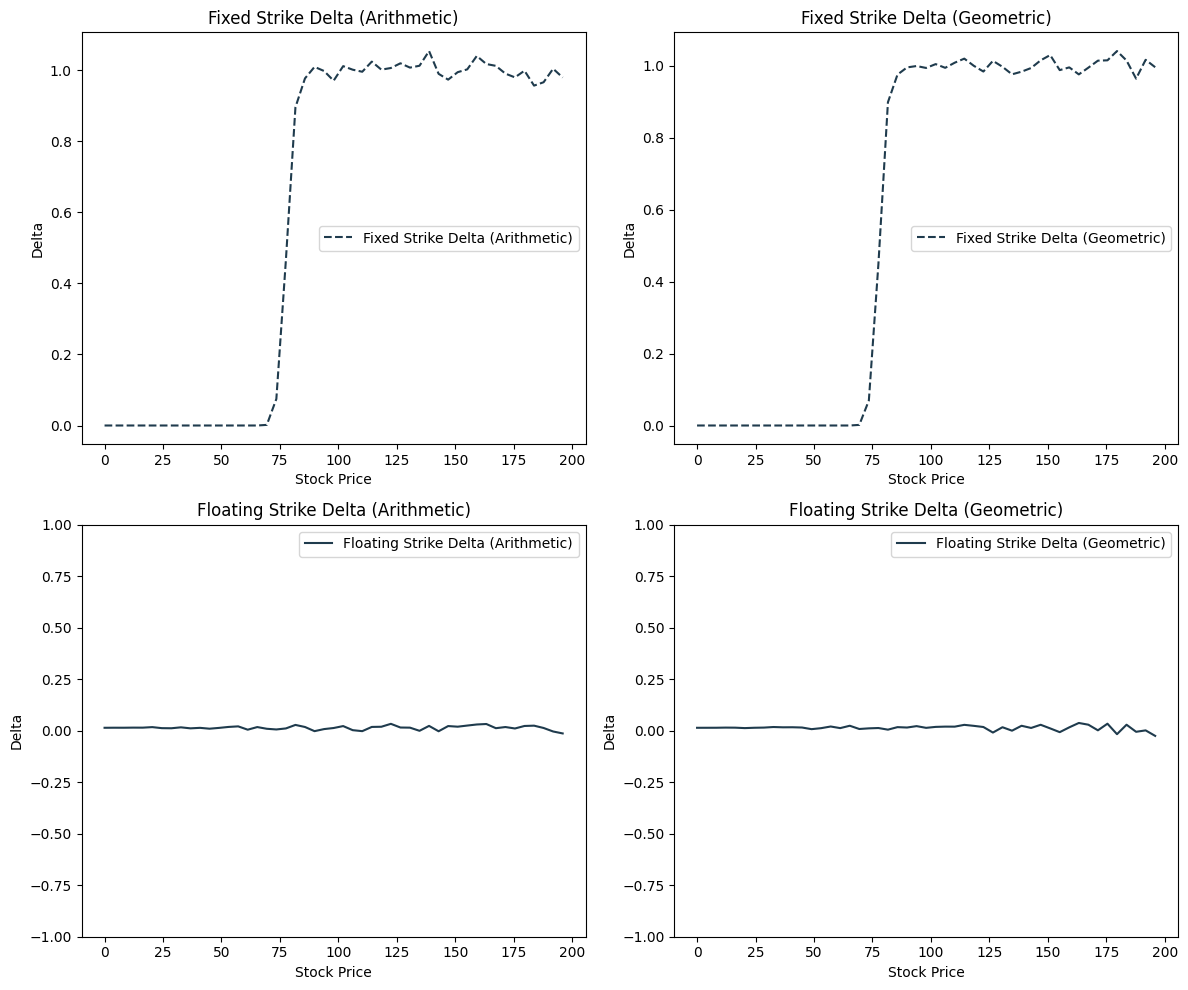

In [83]:
stock_prices = np.linspace(0, 200, 50) # Stock price range of 0 - 200

# Initialize lists to store delta values
deltas_fixed_ar = []
deltas_fixed_geo = []
deltas_floating_ar = []
deltas_floating_geo = []

# Compute delta for Option 4
for i in range(len(stock_prices) - 1):
    S1, S2 = stock_prices[i], stock_prices[i + 1]
    
    # Compute call option prices at two close stock prices for different averaging methods
    time1_fixed_ar = AsianOptionMonteCarlo(S0=S1, K=80, r=r, sigma=0.15, T=60/365, M=M, N=8500, strike_type='fixed', avg_type="arithmetic")
    time2_fixed_ar = AsianOptionMonteCarlo(S0=S2, K=80, r=r, sigma=0.15, T=60/365, M=M, N=8500, strike_type='fixed', avg_type="arithmetic")
    
    time1_floating_ar = AsianOptionMonteCarlo(S0=S1, K=80, r=r, sigma=0.15, T=60/365, M=M, N=8500, strike_type='floating', avg_type="arithmetic")
    time2_floating_ar = AsianOptionMonteCarlo(S0=S2, K=80, r=r, sigma=0.15, T=60/365, M=M, N=8500, strike_type='floating', avg_type="arithmetic")

    time1_fixed_geo = AsianOptionMonteCarlo(S0=S1, K=80, r=r, sigma=0.15, T=60/365, M=M, N=8500, strike_type='fixed', avg_type="geometric")
    time2_fixed_geo = AsianOptionMonteCarlo(S0=S2, K=80, r=r, sigma=0.15, T=60/365, M=M, N=8500, strike_type='fixed', avg_type="geometric")

    time1_floating_geo = AsianOptionMonteCarlo(S0=S1, K=80, r=r, sigma=0.15, T=60/365, M=M, N=8500, strike_type='floating', avg_type="geometric")
    time2_floating_geo = AsianOptionMonteCarlo(S0=S2, K=80, r=r, sigma=0.15, T=60/365, M=M, N=8500, strike_type='floating', avg_type="geometric")

    # Compute call option prices
    call_price1_fixed_ar, _ = time1_fixed_ar.price_option('call')
    call_price2_fixed_ar, _ = time2_fixed_ar.price_option('call')

    call_price1_floating_ar, _ = time1_floating_ar.price_option('call')
    call_price2_floating_ar, _ = time2_floating_ar.price_option('call')

    call_price1_fixed_geo, _ = time1_fixed_geo.price_option('call')
    call_price2_fixed_geo, _ = time2_fixed_geo.price_option('call')

    call_price1_floating_geo, _ = time1_floating_geo.price_option('call')
    call_price2_floating_geo, _ = time2_floating_geo.price_option('call')

    # Compute delta
    delta_fixed_ar = (call_price2_fixed_ar - call_price1_fixed_ar) / (S2 - S1)
    delta_floating_ar = (call_price2_floating_ar - call_price1_floating_ar) / (S2 - S1)

    delta_fixed_geo = (call_price2_fixed_geo - call_price1_fixed_geo) / (S2 - S1)
    delta_floating_geo = (call_price2_floating_geo - call_price1_floating_geo) / (S2 - S1)

    deltas_fixed_ar.append(delta_fixed_ar)
    deltas_floating_ar.append(delta_floating_ar)
    deltas_fixed_geo.append(delta_fixed_geo)
    deltas_floating_geo.append(delta_floating_geo)

delta_color = '#1f3b4d'  # Navy Blue

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Fixed Strike Delta (Arithmetic)
axs[0, 0].plot(stock_prices[:-1], deltas_fixed_ar, label="Fixed Strike Delta (Arithmetic)", linestyle='dashed', color=delta_color)
axs[0, 0].set_title("Fixed Strike Delta (Arithmetic)")
axs[0, 0].set_xlabel("Stock Price")
axs[0, 0].set_ylabel("Delta")
axs[0, 0].legend(loc='center right')

# Floating Strike Delta (Arithmetic)
axs[1, 0].plot(stock_prices[:-1], deltas_floating_ar, label="Floating Strike Delta (Arithmetic)", color=delta_color)
axs[1, 0].set_title("Floating Strike Delta (Arithmetic)")
axs[1, 0].set_xlabel("Stock Price")
axs[1, 0].set_ylabel("Delta")
axs[1, 0].set_ylim(-1,1)
axs[1, 0].legend(loc='upper right')

# Fixed Strike Delta (Geometric)
axs[0, 1].plot(stock_prices[:-1], deltas_fixed_geo, label="Fixed Strike Delta (Geometric)", linestyle='dashed', color=delta_color)
axs[0, 1].set_title("Fixed Strike Delta (Geometric)")
axs[0, 1].set_xlabel("Stock Price")
axs[0, 1].set_ylabel("Delta")
axs[0, 1].legend(loc='center right')

# Floating Strike Delta (Geometric)
axs[1, 1].plot(stock_prices[:-1], deltas_floating_geo, label="Floating Strike Delta (Geometric)", color=delta_color)
axs[1, 1].set_title("Floating Strike Delta (Geometric)")
axs[1, 1].set_xlabel("Stock Price")
axs[1, 1].set_ylabel("Delta")
axs[1, 1].set_ylim(-1,1)
axs[1, 1].legend(loc='upper right')

plt.tight_layout()
plt.show()